## Assignment 4, Dataset 10
## Student Name: Paria Ighanian, Student ID: 0200155529


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [2]:
facebook_G = nx.read_edgelist('Facebook-Ego/3437_3.edges', nodetype=int)

## a. Choose one of the datasets, calculate the betweenness closeness and PageRank mentioned in the lecture on all of the nodes. Please compare the results. What cause the difference between the results?

In [3]:
# Calculate centrality measures
betweenness_centrality = nx.betweenness_centrality(facebook_G)
pagerank = nx.pagerank(facebook_G)


centrality_df = pd.DataFrame({
    'Node': betweenness_centrality.keys(),
    'Betweenness Centrality': betweenness_centrality.values(),
    'PageRank': pagerank.values()
})


In [4]:
centrality_df.sort_values(by='Betweenness Centrality', ascending=False).reset_index(drop=True).head(10)

,Node,Betweenness Centrality,PageRank
0,3830,0.045219,0.031868
1,3782,0.037627,0.014872
2,3793,0.034110,0.020289
3,3738,0.022091,0.010870
4,3859,0.021392,0.005909
5,3836,0.020356,0.008028
6,3756,0.017498,0.013587
7,3861,0.015845,0.010764
8,3763,0.015614,0.006250
9,3851,0.014960,0.019100


In [6]:
centrality_df.sort_values(by='PageRank', ascending=False).reset_index(drop=True).head(10)

,Node,Betweenness Centrality,PageRank
0,3830,0.045219,0.031868
1,3793,0.034110,0.020289
2,3851,0.014960,0.019100
3,3758,0.014579,0.015786
4,3753,0.005324,0.015316
5,3782,0.037627,0.014872
6,3824,0.005071,0.014107
7,3756,0.017498,0.013587
8,3835,0.002953,0.012851
9,3764,0.007691,0.012535


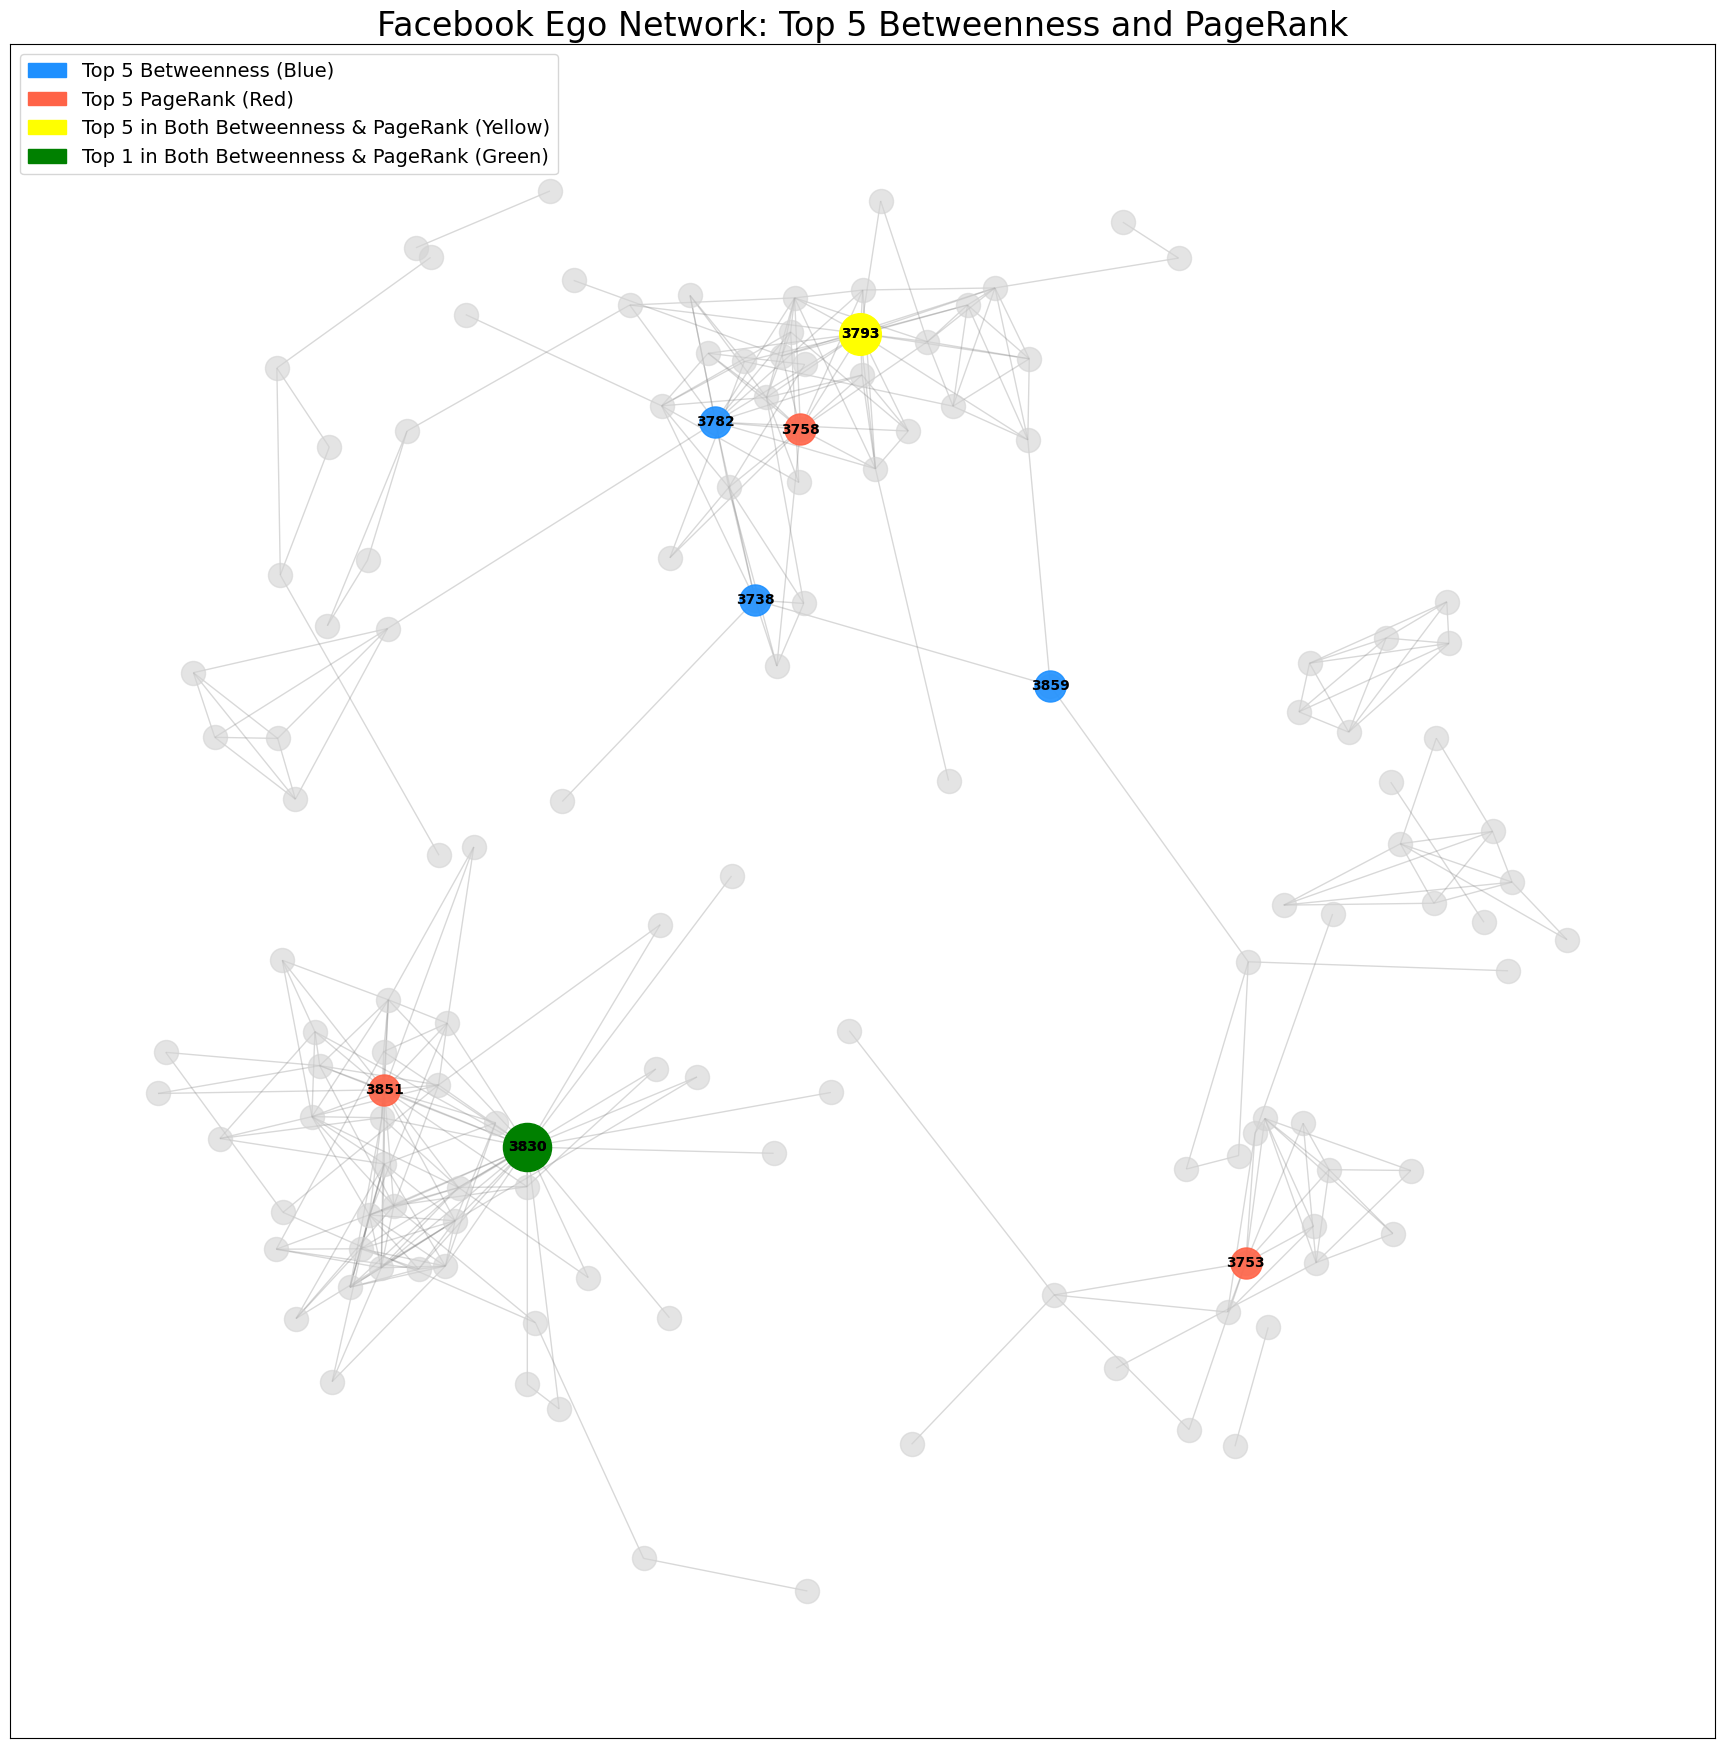

In [5]:
# the top 5 nodes based on betweenness centrality and pagerank
top_5_betweenness_nodes = centrality_df.sort_values(by='Betweenness Centrality', ascending=False)['Node'].head(5).tolist()
top_5_pagerank_nodes = centrality_df.sort_values(by='PageRank', ascending=False)['Node'].head(5).tolist()

highest_betweenness_node = centrality_df.loc[centrality_df['Betweenness Centrality'].idxmax(), 'Node']
highest_pagerank_node = centrality_df.loc[centrality_df['PageRank'].idxmax(), 'Node']

# Find the overlap nodes between the top 5 for both centrality measures
overlap_nodes = list(set(top_5_betweenness_nodes).intersection(set(top_5_pagerank_nodes)))

# Set the color for the node that ranks highest in both Betweenness and PageRank
if highest_betweenness_node == highest_pagerank_node:
    highest_node_in_both = highest_betweenness_node
else:
    highest_node_in_both = None

pos = nx.spring_layout(facebook_G, k=1.5, iterations=300, seed=30)

plt.figure(figsize=(22, 22))

# Draw non-highlighted nodes with light gray color
nx.draw_networkx_nodes(facebook_G, pos, node_color='lightgray', node_size=300, alpha=0.6)

# Highlight the top 5 nodes by betweenness in blue
top_5_betweenness_excl_overlap = [node for node in top_5_betweenness_nodes if node not in overlap_nodes]
nx.draw_networkx_nodes(facebook_G, pos, nodelist=top_5_betweenness_excl_overlap, node_color='#1E90FF', node_size=500, alpha=0.9)  # Blue

# Highlight the top 5 nodes by PageRank in red
top_5_pagerank_excl_overlap = [node for node in top_5_pagerank_nodes if node not in overlap_nodes]
nx.draw_networkx_nodes(facebook_G, pos, nodelist=top_5_pagerank_excl_overlap, node_color='#FF6347', node_size=500, alpha=0.9)  # Red

# Highlight the overlap nodes (in both top 5 Betweenness and PageRank) in yellow
overlap_excl_highest = [node for node in overlap_nodes if node != highest_node_in_both]
nx.draw_networkx_nodes(facebook_G, pos, nodelist=overlap_excl_highest, node_color='yellow', node_size=900, alpha=1)  # Yellow

# Highlight the node that ranks highest in both metrics in green (if it exists)
if highest_node_in_both:
    nx.draw_networkx_nodes(facebook_G, pos, nodelist=[highest_node_in_both], node_color='green', node_size=1200, alpha=1)  # Green

nx.draw_networkx_edges(facebook_G, pos, edge_color='gray', alpha=0.3, width=1)

labels_betweenness = {node: node for node in top_5_betweenness_nodes}
nx.draw_networkx_labels(facebook_G, pos, labels_betweenness, font_size=10, font_color='black', font_weight='bold')

labels_pagerank = {node: node for node in top_5_pagerank_nodes}
nx.draw_networkx_labels(facebook_G, pos, labels_pagerank, font_size=10, font_color='black', font_weight='bold')



legend_elements = [
    mpatches.Patch(color='#1E90FF', label='Top 5 Betweenness (Blue)'),
    mpatches.Patch(color='#FF6347', label='Top 5 PageRank (Red)'),
    mpatches.Patch(color='yellow', label='Top 5 in Both Betweenness & PageRank (Yellow)'),
    mpatches.Patch(color='green', label='Top 1 in Both Betweenness & PageRank (Green)')
]

plt.legend(handles=legend_elements, loc='upper left', fontsize=14)

plt.title('Facebook Ego Network: Top 5 Betweenness and PageRank', fontsize=24)
plt.show()


## b. Please compare the results in (a). What cause the difference between the results?

## c. Please plot the largest strong connected component in the Twitter-Ego dataset.

## d. Choose the results of one of the two algorithms mentioned in question (a), and choose the node with the highest value and the node with lowest value. Please plot the distributions of Jaccard similarity, cosine similarity and normalized Euclidean distance between either of the two nodes and the rest of the nodes in the graph.